### presenters:

##### Maya Lagziel-316106509
##### Halel Shtern-212122147
##### Matanya Sido-20543868
##### Barak Elitzur-315671040


In [4]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'c:\users\97250\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\97250\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\97250\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\97250\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta

In [67]:
url = 'https://raw.githubusercontent.com/barakelitzur/final_project/main/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv'
Crashes_df = pd.read_csv(url)
#Image(url= "", width=350, height=350)
print("The data has", Crashes_df.shape[0], "rows and", Crashes_df.shape[1], "columns.")

The data has 4967 rows and 17 columns.


In [66]:
Crashes_df.columns =Crashes_df.columns.str.replace('#', 'number')
Crashes_df.dtypes

Date                      object
Time                      object
Location                  object
Operator                  object
Flight number             object
Route                     object
AC Type                   object
Registration              object
cn/ln                     object
Aboard                   float64
Aboard Passangers        float64
Aboard Crew              float64
Fatalities               float64
Fatalities Passangers    float64
Fatalities Crew          float64
Ground                   float64
Summary                   object
dtype: object

##### ראינו שיש סולמית ב"פלייט" ולכן שינינו אותה ל"נמבר" בכדי שלא יהיה סולמית

In [100]:
Crashes_df['Date'] = pd.to_datetime(Crashes_df['Date'])
Crashes_df['Time'] = pd.to_datetime(Crashes_df['Time'])
Crashes_df['year'] = pd.DatetimeIndex(Crashes_df['Date']).year
Crashes_df['month'] = pd.DatetimeIndex(Crashes_df['Date']).month
Crashes_df['hour'] = pd.DatetimeIndex(Crashes_df['Time']).hour
Crashes_df.head()

ParserError: hour must be in 0..23: 91:5

##### הפכנו את התאריך ל"דייט טיים" והוספנו עמודות של שנה וחודש

In [71]:
Crashes_df['Fatalities Passangers'] = Crashes_df['Fatalities Passangers'].isnull()==False
Crashes_df['Fatalities Crew'] = Crashes_df['Fatalities Crew'].isnull()==False
Crashes_df['Fatalities'] = Crashes_df['Fatalities'].isnull()==False
#מתניה וברק - לתקן true וFalse בעמודות של Fatalities
Crashes_df.head(3)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,month
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,True,True,True,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,True,True,True,0.0,Eugene Lefebvre was the first pilot to ever be...,1909,9
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,True,True,True,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7


##### מחקנו את השורות שלא כתוב לנו בהם מה כמות המתים כי לא נוכל להשתמש לנתח שורות אלו
##### ניתן לוותר על שורות אלו מכייון שביחס הם לא קריטיות ולא ניתן למלא אותם כי לא ניתן לשער כמות אנשים מתים

In [72]:
Crashes_by_year_df=Crashes_df.groupby("year")[["Date"]].count().reset_index()
#Crashes_by_year_df

[]

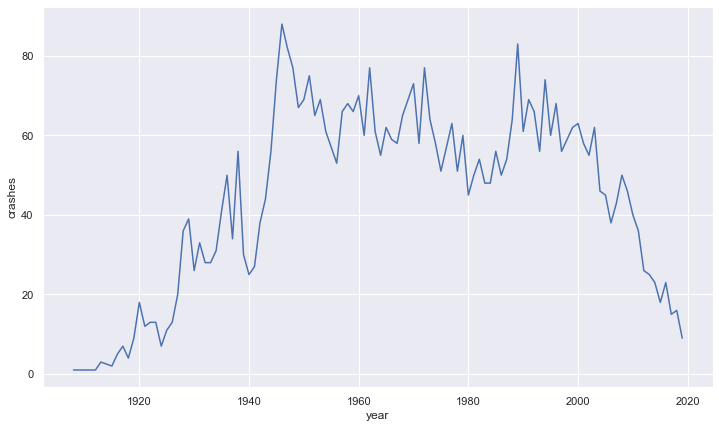

In [96]:
#sns.lineplot(x='year', y='Date', data=Crashes_by_year_df)
fig=plt.figure(1, figsize = (12,7))
year_crashes = pd.DataFrame({'year': Crashes_by_year_df["year"], 'crashes': Crashes_by_year_df["Date"]})
sns.lineplot(x='year', y='crashes', data=year_crashes).plot(figsize=(15,7),xticks=(),title='gross in relation to years')

<AxesSubplot:title={'center':'gross in relation to years'}, xlabel='year'>

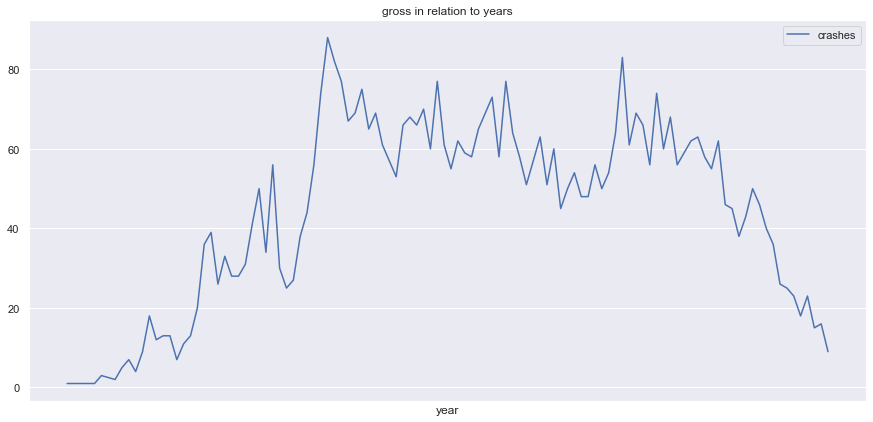

In [74]:
#pd.pivot_table( Crashes_by_year_df,index = ['year'], values = ['']).plot(figsize=(15,7),xticks=(),title='gross in relation to years')
pd.pivot_table(year_crashes,index = ['year'], values = ['crashes']).plot(figsize=(15,7),xticks=(),title='gross in relation to years')

לחשוב אם רוצים סרגל של השנים למטה

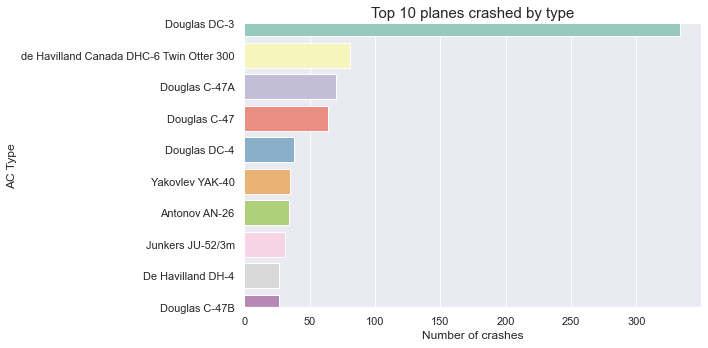

In [94]:
Crashes_by_ac=Crashes_df.groupby("AC Type")[["Fatalities"]].count().reset_index()
Crashes_by_ac.sort_values("Fatalities", ascending = False)
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(y='AC Type', data=Crashes_df, order=Crashes_df['AC Type'].value_counts().index, palette='Set3')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Top 10 planes crashed by type', size=15)
axes.set(xlabel='Number of crashes', ylabel='AC Type')
plt.tight_layout()

##### בדקנו באיזה סוג מטוסים התרסק הכי הרבה לכן נמליץ לא להשתמש במטוסים אלו

##### ,במידה ואין ברירה אלא להשתמש במטוס שיש לו הסטוריה של התרסקויות
##### נעדיף לבחור במטוסים בעלי מספר ההתרסקויות הנמוך ביותר
##### נבדוק מכל סוג מטוס שהתרסק באיזה מטוסים היה אחוז הניצולים הגדול ביותר

In [76]:
Crashes_by_ac=Crashes_df.groupby("AC Type")[["Fatalities"]]
Crashes_by_ac.head()

,Fatalities
0,True
1,True
2,True
3,True
4,True
...,...
4962,True
4963,True
4964,True
4965,True


In [46]:
Crashes_by_ac1= Crashes_df[[Crashes_df["Fatalities"]== 1]]

#Crashes_by_ac1=Crashes_df.groupby("AC Type")[["Fatalities","Aboard"]].count().reset_index()
#Crashes_by_ac1["F_per"]=Crashes_by_ac1


לסיים

In [77]:
Crashes_by_location_df = Crashes_df.groupby("Location")[["month"]].count().reset_index().sort_values("month", ascending = False)
Top5 = Crashes_by_location_df.head(5)
#להתלבט בין 5 ל10

In [49]:
#location_crashes.plot.scatter(x = 'Location', y = 'crashes' , figsize=(10,4), color = "green")

<AxesSubplot:xlabel='Location', ylabel='crashes'>

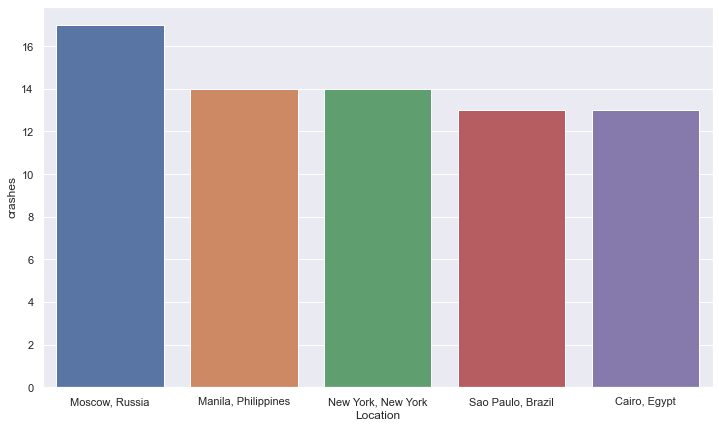

In [91]:
fig=plt.figure(1, figsize = (12,7))
#tcf = sns.load_dataset('tips')
sns.barplot(x='Location', y='crashes', data=location_crashes)
#לא הצלחתי להגידל את התרשים ולא לשנות את הכותרת של ציר Y

##### ראינו שמעל מוסקבה היו הכי הרבה התרסקויות. ננסה למצוא מכנים משותפים להתרסקויות הללו במטרה לראות אם יש קשר בין המיקום הגאגורפי להתרסקויות. 
##### העמודות שעניינו אותנו - סוג מטוס, כמות אנשים,מסלול, מפעיל

In [24]:
Crashes_moscow_df = Crashes_df[Crashes_df["Location"]=="Moscow,x Russia"]
#Crashes_moscow_df.pivot_table(["Operator","Aboard", "Route" , "AC Type"], "Location")